In [128]:
## Load packages 
#importing modules
import os
import pip

import numpy as np
%pip install mne
import mne # type: ignore

%pip install pandas
%pip install scikit-learn


import pandas as pd
import sklearn

import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from pathlib import Path
  
import os
import matplotlib.pyplot as plt
%matplotlib inline


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [149]:
# Load data 
# Define the subject and file path
eeg_subj = 'Group12_own' # this is mads I hope
path = "/Users/lina/Documents/GitHub/ore_EEG/data/"
data_raw_file = os.path.join(path, eeg_subj + '.vhdr')
raw = mne.io.read_raw_brainvision(data_raw_file, eog = ('HEOG', 'VEOG'), misc = ["41"])
raw.info['bads'] = []
raw.load_data()

# Find out channels 
print(raw.info['ch_names'])

# For the second one 
# Load data from fif file 
data_raw_file2 =os.path.join(path, "group12_own_AH-raw.fif")
raw2 = mne.io.read_raw_fif(data_raw_file2, preload=True)
raw2.load_data()
print(raw2.info['ch_names']) # seems like P09 and PO10 are replacements for HEOG and VEOG
channel_types = {
    '41': 'misc',     # Misc, the other two from above do not exist
    'PO9': 'eog',
    'PO10': 'eog',
}

raw2.set_channel_types(channel_types)
print(raw2.get_channel_types())


Extracting parameters from /Users/lina/Documents/GitHub/ore_EEG/data/Group12_own.vhdr...
Setting channel info structure...
Reading 0 ... 523239  =      0.000 ...   523.239 secs...


/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_18847/1993757823.py:6: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(data_raw_file, eog = ('HEOG', 'VEOG'), misc = ["41"])


['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P3', 'Pz', 'P4', 'P8', 'HEOG', 'O1', 'Oz', 'O2', 'VEOG', '41']
Opening raw data file /Users/lina/Documents/GitHub/ore_EEG/data/group12_own_AH-raw.fif...
    Range : 9000000 ... 9600000 =   9000.000 ...  9600.000 secs
Ready.
Reading 0 ... 600000  =      0.000 ...   600.000 secs...
['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10', '41']
['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eog', 'eeg', 'eeg', 'eeg', 'eog', 'misc']


### Setting montage and common ave referencing

In [150]:
# selecting only EEG and stimulus data & plotting raw data
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, verbose=False)
raw.pick_types(meg=False, eeg=True, eog=True, misc=True, exclude=[])
raw.set_eeg_reference(ref_channels='average', ch_type='eeg')

# selecting only EEG and stimulus data & plotting raw data
montage2 = mne.channels.make_standard_montage('standard_1020')
raw2.set_montage(montage2, verbose=False)
raw2.pick_types(meg=False, eeg=True, eog=True, misc=True, exclude=[])
raw2.set_eeg_reference(ref_channels='average', ch_type='eeg')

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying average reference.
Applying a custom ('EEG',) reference.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying average reference.
Applying a custom ('EEG',) reference.


/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_18847/1107183209.py:9: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['PO9', 'PO10']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw2.set_montage(montage2, verbose=False)


<Raw | group12_own_AH-raw.fif, 33 x 600001 (600.0 s), ~151.1 MB, data loaded>

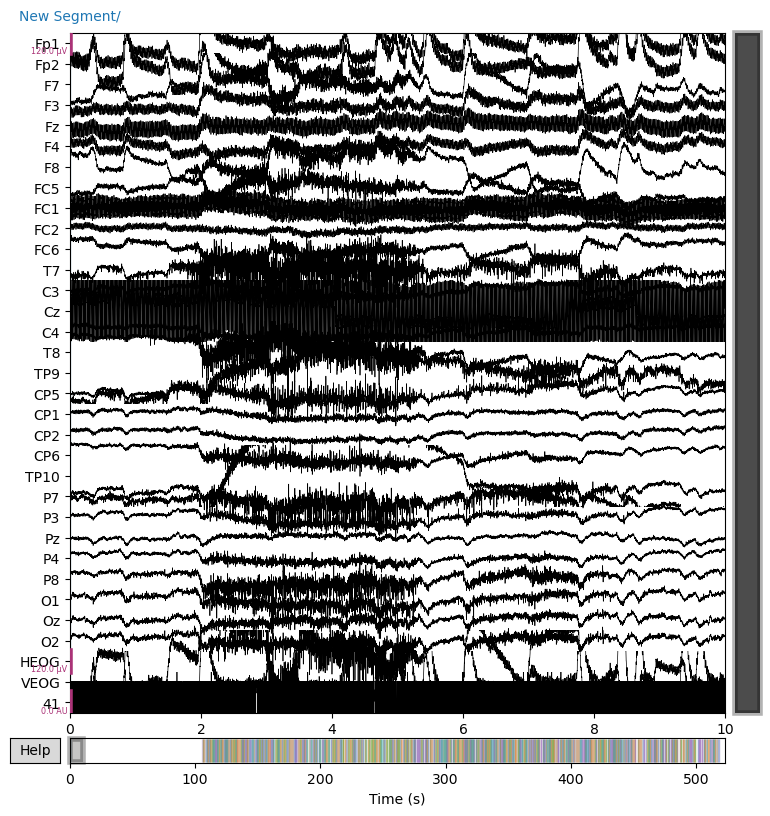

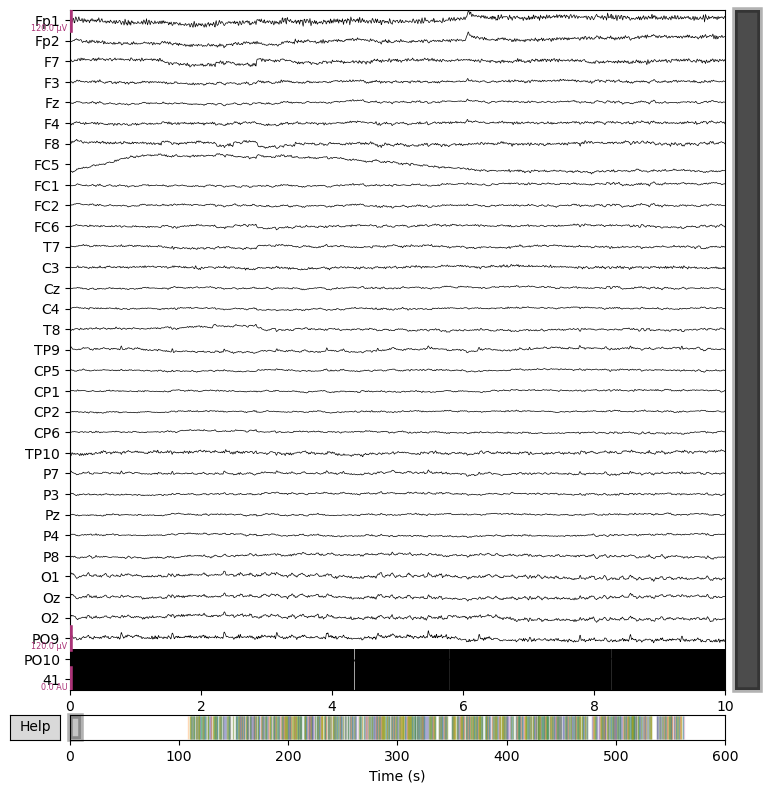

In [151]:
# Plot 
raw.plot(scalings=60e-6, n_channels=33);
raw2.plot(scalings=60e-6, n_channels=33);

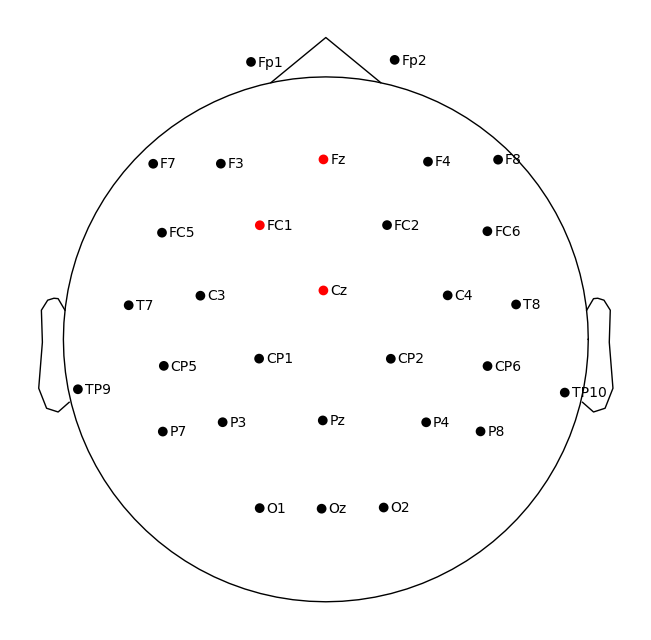

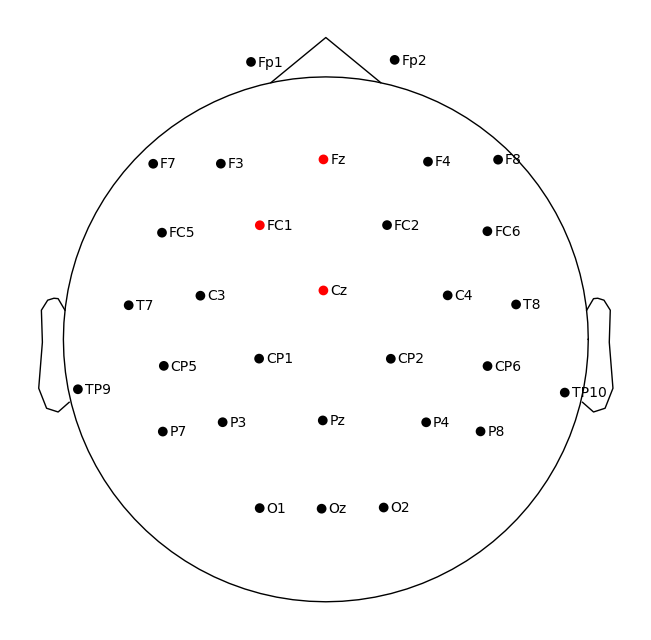

In [172]:
# remove bad channels 
### FIGURE OUT IF HEOG AND VEOG SHOULD BE REMOVED
mne.viz.plot_sensors(raw.info, kind='topomap', ch_type='eeg', show_names=True, title='EEG Sensor Locations');
raw.info["bads"] = ["Cz", "FC1", "41", "Fz", "HEOG", "VEOG"]

# For second data
mne.viz.plot_sensors(raw2.info, kind='topomap', ch_type='eeg', show_names=True, title='EEG Sensor Locations');
raw2.info["bads"] = ["Cz", "FC1", "41", "Fz", "PO10", "PO9"] # do we always just remove the same ones for all data 

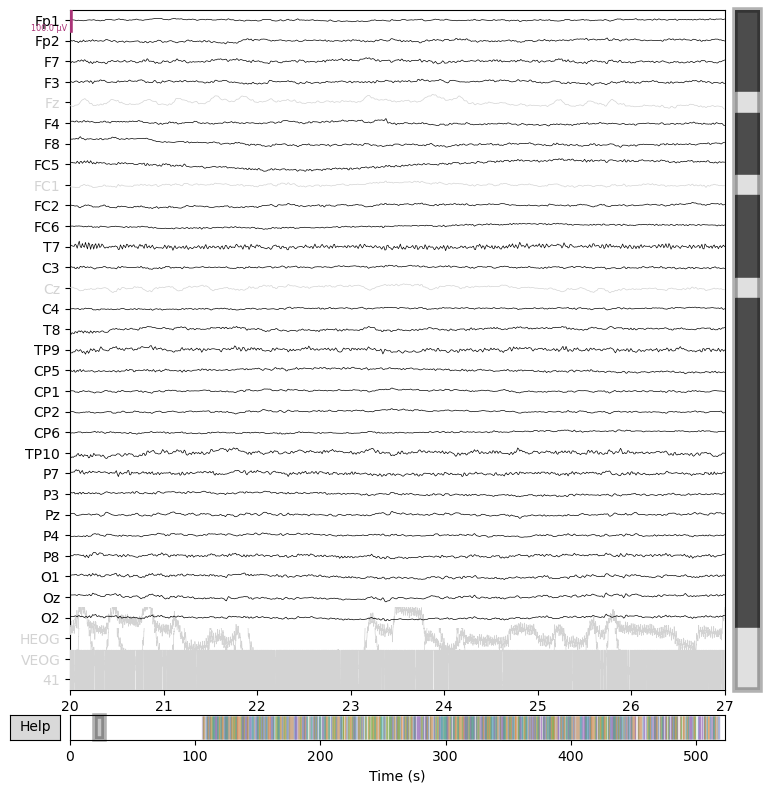

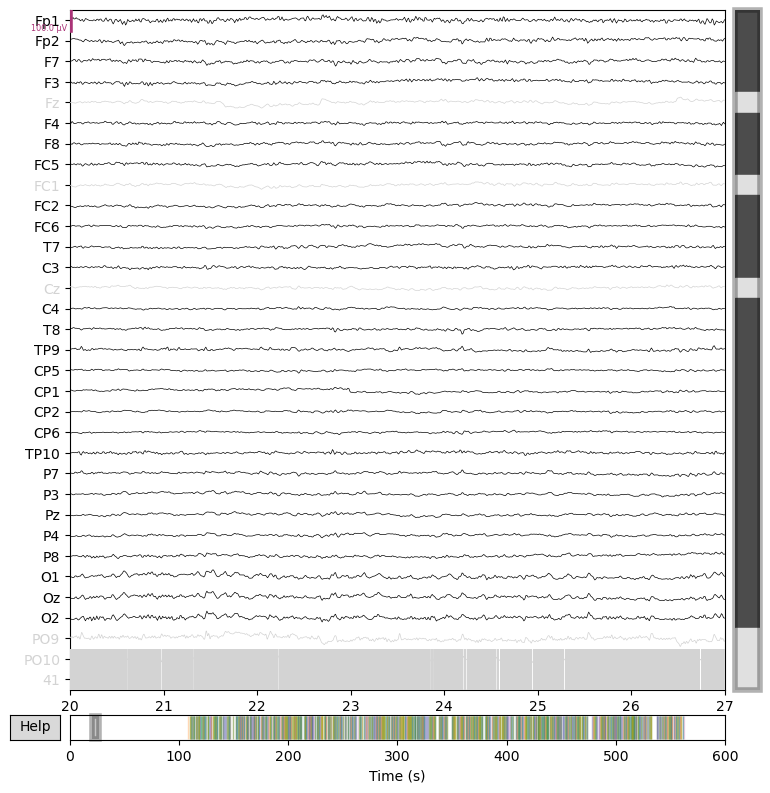

In [173]:
# Plot again after removing bad channels
raw.plot(n_channels=33, scalings=50e-6, duration = 7, start = 20) ; # what about the two in the end?
raw2.plot(n_channels=33, scalings=50e-6, duration = 7, start = 20) ;

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.9s finished


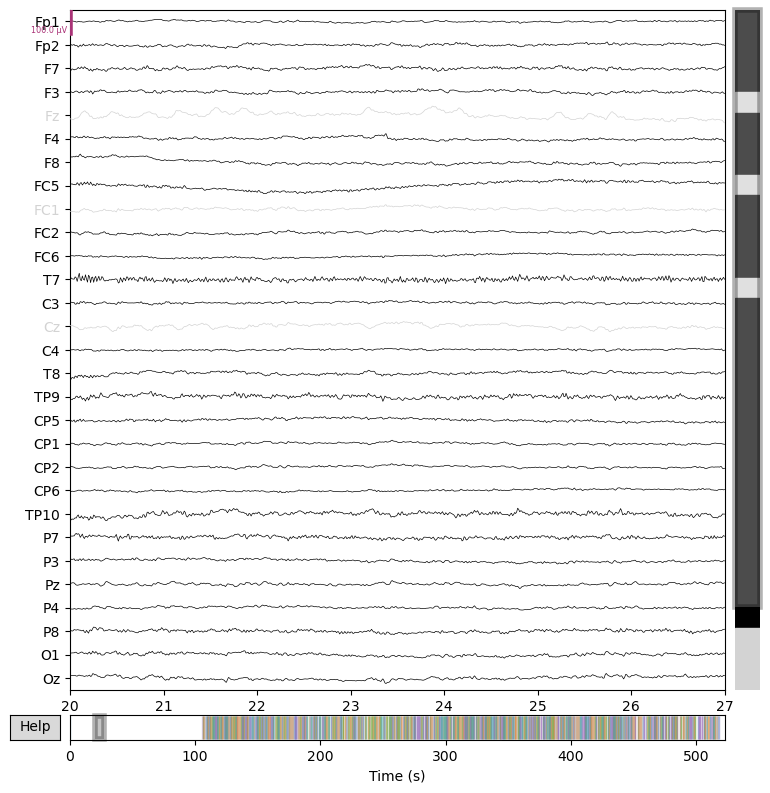

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.9s finished


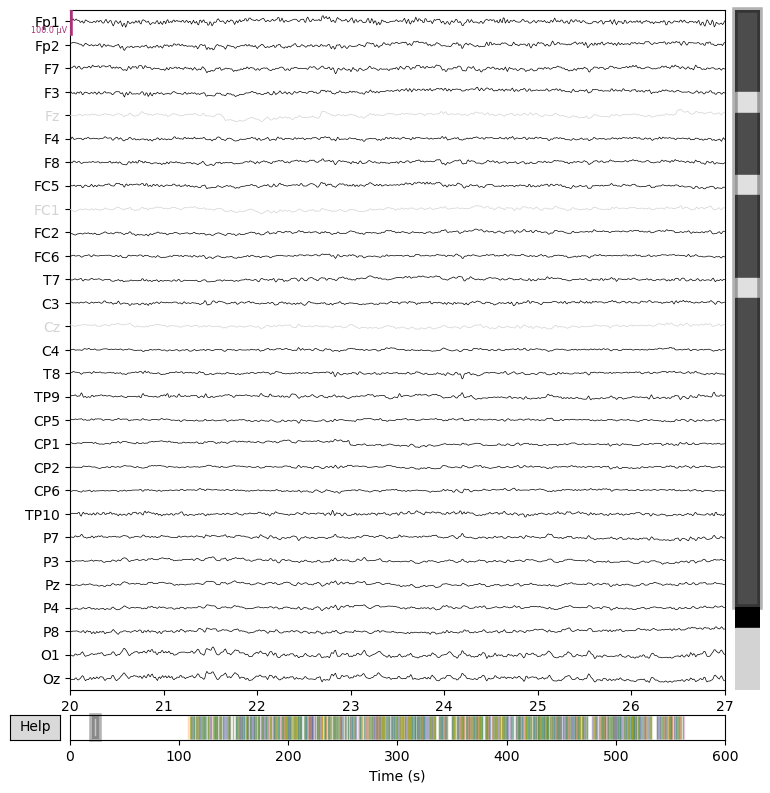

In [174]:
## Filter 
raw.filter(l_freq = 0.1, h_freq =30)
raw.plot(n_channels=29, scalings=50e-6, duration=7, start=20);

# for 2
raw2.filter(l_freq = 0.1, h_freq =30)
raw2.plot(n_channels=29, scalings=50e-6, duration=7, start=20);

Fitting ICA to data using 27 channels (please be patient, this may take a while)
Selecting by explained variance: 15 components
Fitting ICA took 20.9s.


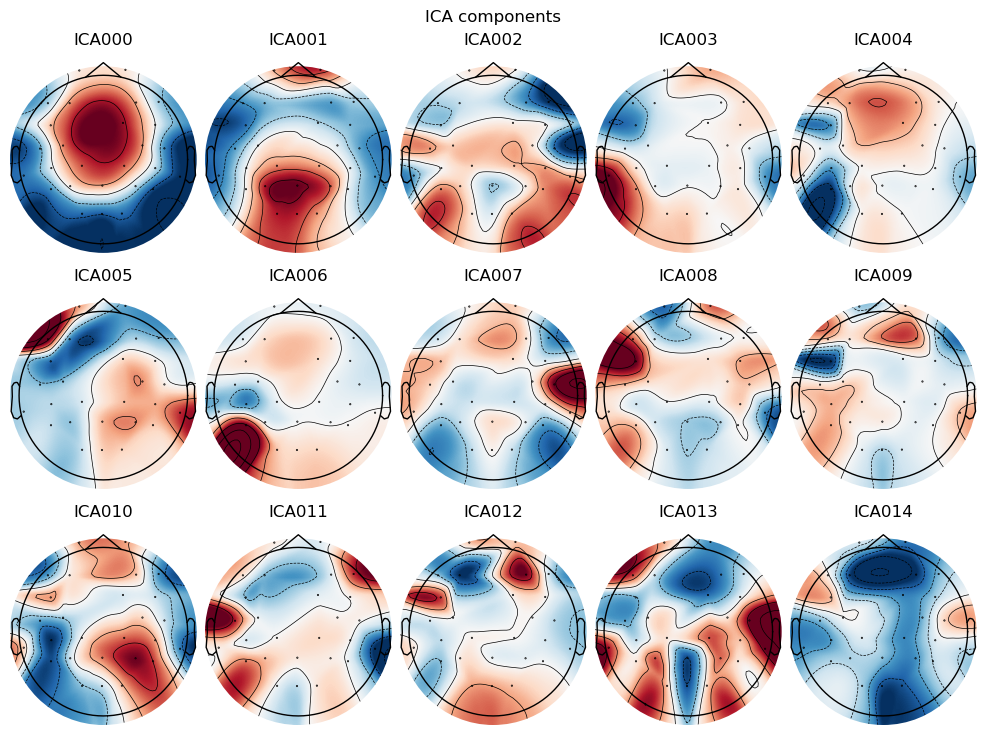

Creating RawArray with float64 data, n_channels=15, n_times=523240
    Range : 0 ... 523239 =      0.000 ...   523.239 secs
Ready.


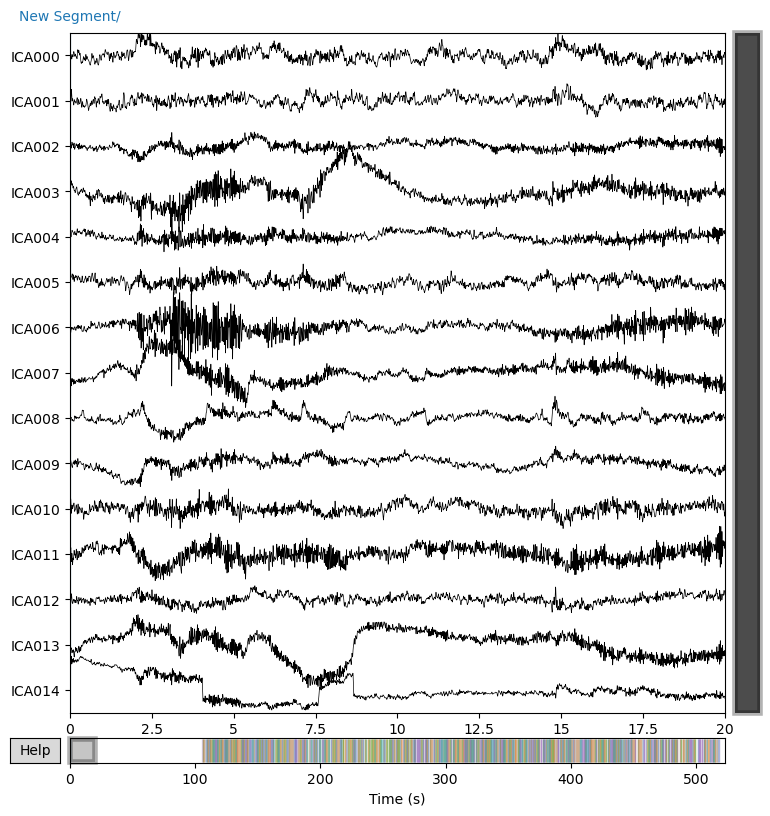

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 2 ICA components
    Projecting back using 27 PCA components
Fitting ICA to data using 27 channels (please be patient, this may take a while)
Selecting by explained variance: 17 components
Fitting ICA took 19.8s.


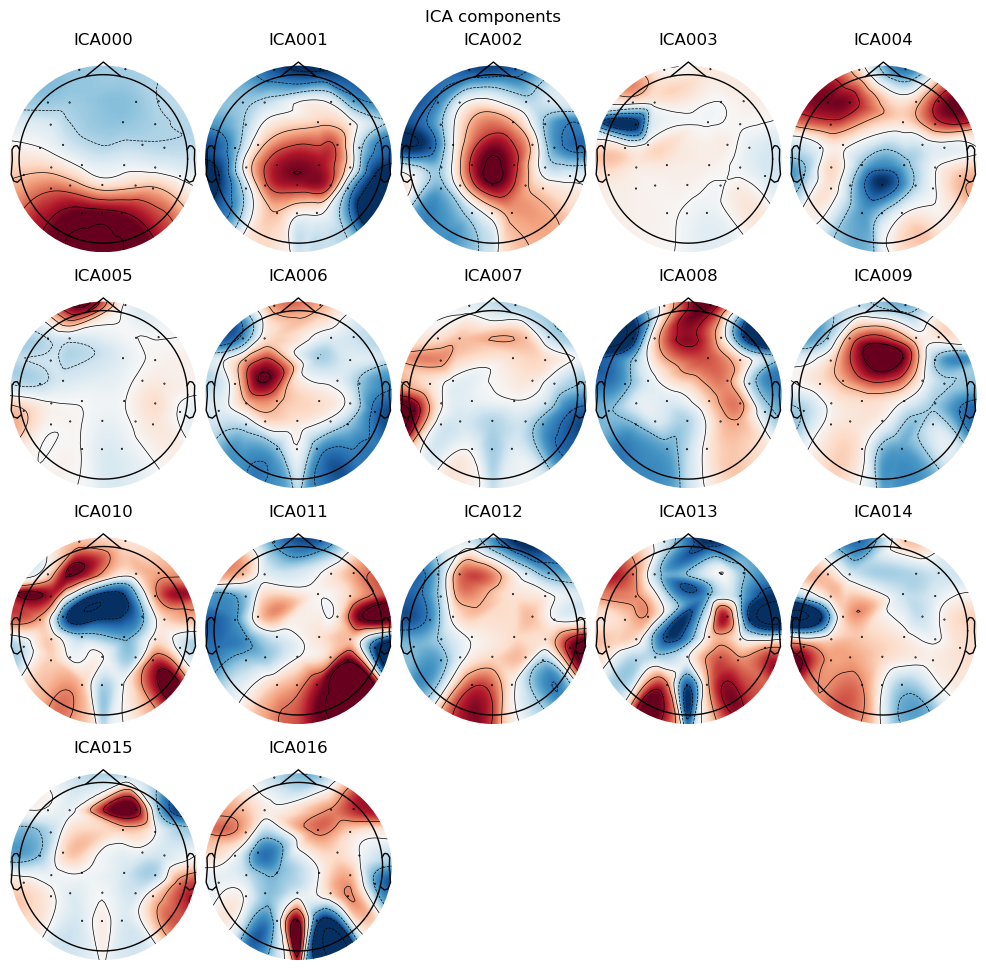

Creating RawArray with float64 data, n_channels=17, n_times=600001
    Range : 9000000 ... 9600000 =   9000.000 ...  9600.000 secs
Ready.


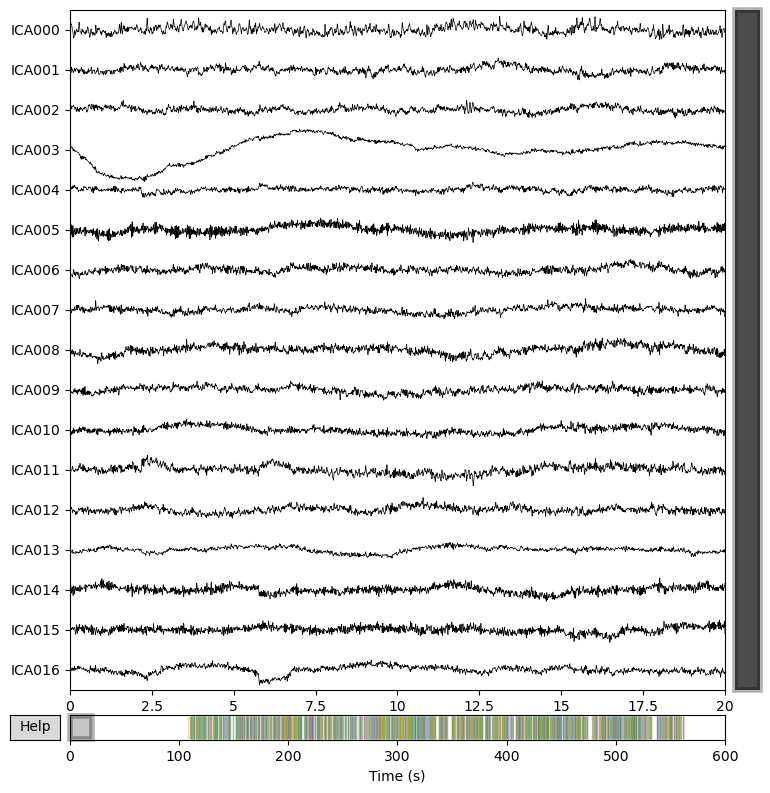

Applying ICA to Raw instance
    Transforming to ICA space (17 components)
    Zeroing out 2 ICA components
    Projecting back using 27 PCA components


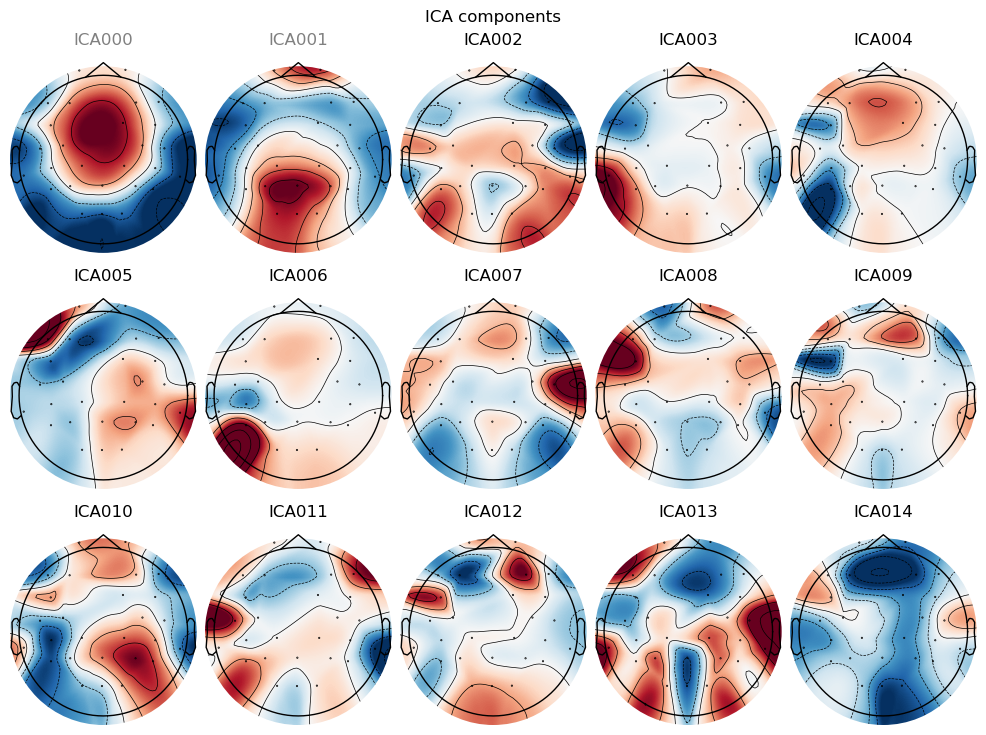

Creating RawArray with float64 data, n_channels=15, n_times=523240
    Range : 0 ... 523239 =      0.000 ...   523.239 secs
Ready.


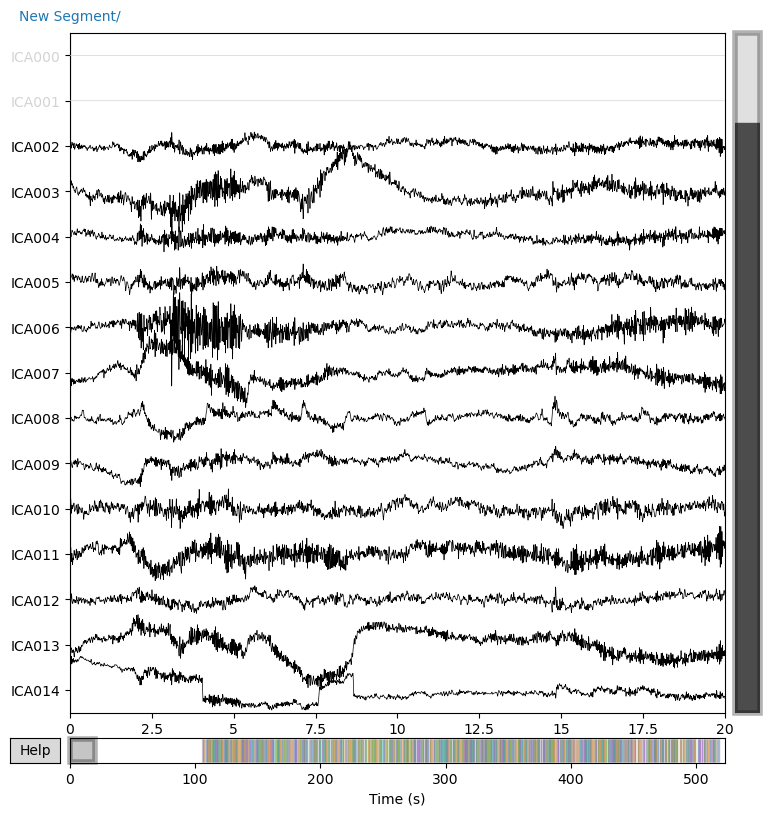

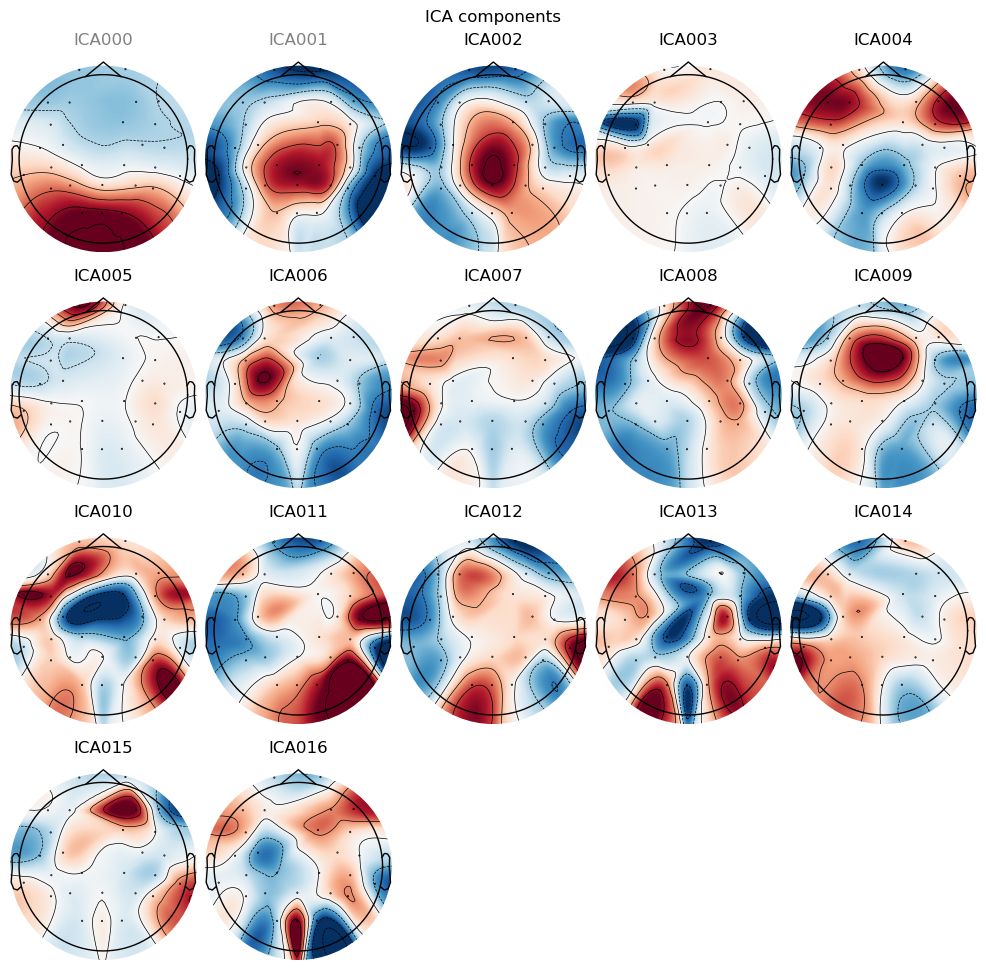

Creating RawArray with float64 data, n_channels=17, n_times=600001
    Range : 9000000 ... 9600000 =   9000.000 ...  9600.000 secs
Ready.


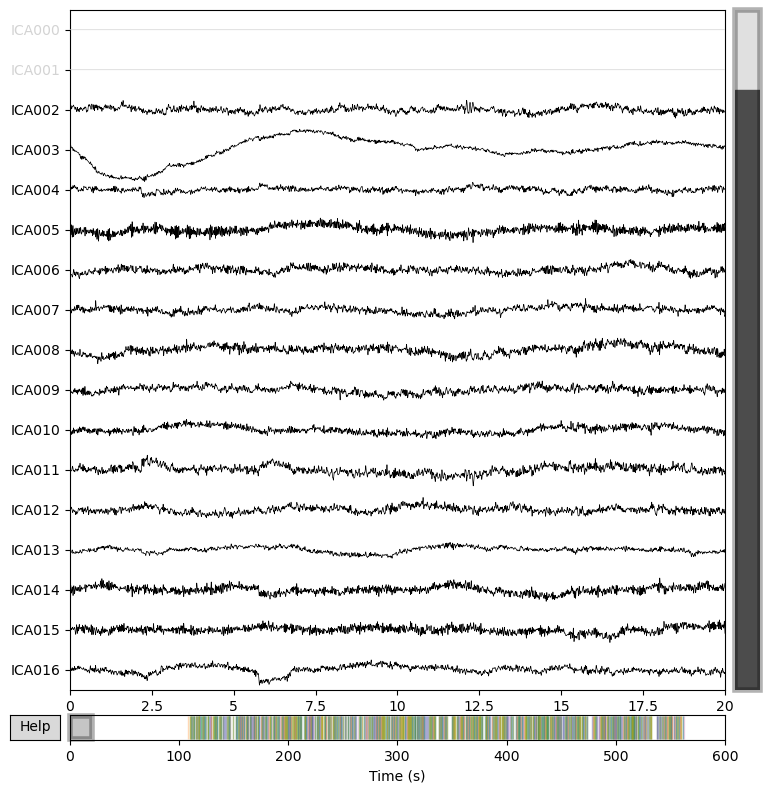

In [175]:
import mne
import sklearn  # scikit-learn is needed to run ICA (Independent Component Analysis)

# Perform ICA on raw
ica = mne.preprocessing.ICA(n_components=0.95, random_state=7, max_iter=800)
ica.fit(raw)
ica.plot_components()
ica.plot_sources(raw)
ica.exclude = [0, 1]
ica.apply(raw)

# Perform ICA on raw2 with the same parameters and exclusion
ica2 = mne.preprocessing.ICA(n_components=0.95, random_state=7, max_iter=800)
ica2.fit(raw2)
ica2.plot_components()
ica2.plot_sources(raw2)
ica2.exclude = ica.exclude  # Apply the same exclusion criteria
ica2.apply(raw2)

# Plot again after applying ICA
ica.plot_components();
ica.plot_sources(raw);

ica2.plot_components();
ica2.plot_sources(raw2);


In [177]:
import pandas as pd

# import data
behav_data = pd.read_csv("/Users/lina/Documents/GitHub/ore_EEG/data/cleaned_logfile_sub1.csv")
# Convert all values to lowercase in the 'gender' column
behav_data['gender'] = behav_data['gender'].str.lower() # mads

# Replace 'female' with 'male' in the 'gender' column
behav_data['gender'] = behav_data['gender'].replace('female', 'male') # mads

# Check if the image filename contains a capital 'A', and if so, change the 'img_ethnicity' column to 'asian'
behav_data.loc[behav_data['i'].str.contains('A'), 'img_ethnicity'] = 'asian'

# Add a new column to the DataFrame
behav_data['ethnicity_trigger'] = ""

# Assign trigger values in the new column
for index, row in behav_data.iterrows():
    emotion = row["img_emotion"]  # Accessing value in the 'img_emotion' column of the current row
    ethnicity = row["img_ethnicity"]  # Accessing value in the 'img_ethnicity' column of the current row

    if emotion == "neutral":
        if ethnicity == "asian":
            behav_data.at[index, "ethnicity_trigger"] = 41 # asian/neutral
        elif ethnicity == "black":
            behav_data.at[index, "ethnicity_trigger"] = 42 # black/neutral
        else:
            behav_data.at[index, "ethnicity_trigger"] = 43  # white/neutral

    elif emotion == "happy": 
        if ethnicity == "asian":
            behav_data.at[index, "ethnicity_trigger"] = 21  # asian/happy
        elif ethnicity == "black":
            behav_data.at[index, "ethnicity_trigger"] = 22  # black/happy
        else:
            behav_data.at[index, "ethnicity_trigger"] = 23  # white/happy

    else:  # Assuming 'sad' emotion
        if ethnicity == "asian":
            behav_data.at[index, "ethnicity_trigger"] = 31  # asian/sad
        elif ethnicity == "black":
            behav_data.at[index, "ethnicity_trigger"] = 32  # black/sad
        else:
            behav_data.at[index, "ethnicity_trigger"] = 33  # white/sad

# Save the modified DataFrame back to the same file
behav_data.to_csv("/Users/lina/Documents/GitHub/ore_EEG/data/cleaned_logfile_sub1.csv", index=False)

# Import new data
behav_data_new = pd.read_csv("/Users/lina/Documents/GitHub/ore_EEG/data/cleaned_logfile_sub1.csv")

counter = 0
for event in events:
    if event[-1] in [20, 30, 40]:

        # Get the corresponding event from the behavioral data
        behav_event = behav_data_new.iloc[counter]
        counter += 1

        # Extract relevant information from the behav_event
        ethnicity_trigger = behav_event["ethnicity_trigger"]
        
        # Assign event numbers based on the ethnicity_trigger value
        event[-1] = ethnicity_trigger

for event in events: 
    print(event[-1])

## ASSIGN IDs
event_id = {
    'neutral/black': 42,
    'neutral/white': 43,
    'happy/asian': 21,
    'happy/black': 22,
    'happy/white': 23,
    'sad/asian': 31,
    'sad/black': 32,
    'sad/white': 33,
    'incorrect': 50,
    'sadcorrect/response': 130,
    'neutral/response': 140,
    'happycorrect/response': 220
}

99999
42
140
22
220
22
220
42
140
32
130
21
220
43
140
22
220
21
220
33
130
33
130
32
130
42
140
43
140
33
130
32
130
23
220
33
130
33
130
23
220
21
220
43
140
32
130
33
130
31
130
22
220
22
220
42
140
21
220
21
220
31
130
21
220
31
130
32
50
22
220
23
220
21
220
21
220
31
130
43
140
32
130
21
220
43
140
42
140
22
220
21
220
42
140
42
140
31
130
32
130
21
220
43
140
42
140
33
130
32
130
22
220
33
130
42
140
23
220
43
140
22
220
42
140
32
130
22
220
23
50
22
220
43
140
43
140
33
130
23
220
32
50
31
130
32
130
31
130
21
220
22
220
42
140
22
220
33
130
21
220
31
130
43
140
23
220
23
220
22
220
21
220
21
220
43
140
42
140
42
140
43
140
22
220
22
220
32
130
22
220
42
140
43
140
32
50
22
220
43
140
32
130
22
220
43
140
33
130
42
140
23
220
42
140
22
220
43
140
32
130
33
130
43
140
43
140
33
130
32
130
23
220
21
220
32
130
31
130
42
140
22
220
32
130
23
220
32
130
42
140
23
220
23
220
23
220
43
140
32
130
21
220
32
130
22
220
43
140
22
220
32
130
23
220
21
220
32
50
42
140
33
130
42
140
42
14

In [158]:
# SAME FOR SECOND DATA

# import data
behav_data = pd.read_csv("/Users/lina/Documents/GitHub/ore_EEG/data/cleaned_logfile_ah.csv")
# Convert all values to lowercase in the 'gender' column
behav_data['gender'] = behav_data['gender'].str.lower() # mads

# Replace 'female' with 'male' in the 'gender' column
behav_data['gender'] = behav_data['gender'].replace('female', 'male') # mads

# Check if the image filename contains a capital 'A', and if so, change the 'img_ethnicity' column to 'asian'
behav_data.loc[behav_data['i'].str.contains('A'), 'img_ethnicity'] = 'asian'

# Add a new column to the DataFrame
behav_data['ethnicity_trigger'] = ""

# Assign trigger values in the new column
for index, row in behav_data.iterrows():
    emotion = row["img_emotion"]  # Accessing value in the 'img_emotion' column of the current row
    ethnicity = row["img_ethnicity"]  # Accessing value in the 'img_ethnicity' column of the current row

    if emotion == "neutral":
        if ethnicity == "asian":
            behav_data.at[index, "ethnicity_trigger"] = 41 # asian/neutral
        elif ethnicity == "black":
            behav_data.at[index, "ethnicity_trigger"] = 42 # black/neutral
        else:
            behav_data.at[index, "ethnicity_trigger"] = 43  # white/neutral

    elif emotion == "happy": 
        if ethnicity == "asian":
            behav_data.at[index, "ethnicity_trigger"] = 21  # asian/happy
        elif ethnicity == "black":
            behav_data.at[index, "ethnicity_trigger"] = 22  # black/happy
        else:
            behav_data.at[index, "ethnicity_trigger"] = 23  # white/happy

    else:  # Assuming 'sad' emotion
        if ethnicity == "asian":
            behav_data.at[index, "ethnicity_trigger"] = 31  # asian/sad
        elif ethnicity == "black":
            behav_data.at[index, "ethnicity_trigger"] = 32  # black/sad
        else:
            behav_data.at[index, "ethnicity_trigger"] = 33  # white/sad

# Save the modified DataFrame back to the same file
behav_data.to_csv("/Users/lina/Documents/GitHub/ore_EEG/data/cleaned_logfile_ah.csv", index=False)

# Import new data
behav_data_new = pd.read_csv("/Users/lina/Documents/GitHub/ore_EEG/data/cleaned_logfile_ah.csv")

counter = 0
for event in events2:
    if event[-1] in [20, 30, 40]:

        # Get the corresponding event from the behavioral data
        behav_event = behav_data_new.iloc[counter]
        counter += 1

        # Extract relevant information from the behav_event
        ethnicity_trigger = behav_event["ethnicity_trigger"]
        
        # Assign event numbers based on the ethnicity_trigger value
        event[-1] = ethnicity_trigger

for event in events2: 
    print(event[-1])

### ASSIGN IDS

event_id2 = {
    'neutral/black': 42,
    'neutral/white': 43,
    'happy/asian': 21,
    'happy/black': 22,
    'happy/white': 23,
    'sad/asian': 31,
    'sad/black': 32,
    'sad/white': 33,
    'incorrect': 50,
    'sadcorrect/response': 130,
    'neutral/response': 140,
    'happycorrect/response': 220
}

33
130
32
130
42
140
22
220
43
140
43
140
31
130
43
140
32
130
33
130
22
220
42
140
42
140
32
130
43
140
21
220
42
140
33
130
23
220
22
220
21
220
32
130
32
130
43
140
43
140
32
130
23
220
43
140
32
130
43
140
22
220
21
220
23
220
22
220
42
140
32
130
42
140
22
220
42
140
43
140
22
220
42
140
33
130
21
220
23
220
33
130
22
220
31
130
22
220
32
130
31
130
23
50
42
140
43
140
21
220
23
220
23
220
33
130
22
220
32
130
43
140
33
130
23
220
22
220
32
130
43
140
23
220
21
220
43
140
42
140
21
220
32
130
33
130
21
220
43
140
42
140
31
50
31
130
42
140
42
140
23
220
31
130
43
140
23
220
31
130
33
130
31
130
31
130
21
50
22
220
32
130
23
220
32
130
32
130
32
130
22
220
33
130
32
130
33
130
23
220
43
140
42
140
42
140
31
130
32
130
23
220
22
220
31
50
22
220
33
50
33
130
23
50
22
220
23
220
21
220
43
140
42
140
32
130
23
220
22
220
32
130
33
130
31
130
33
130
21
220
32
130
42
140
21
220
42
140
32
130
33
130
43
140
23
220
42
140
23
220
42
140
22
220
32
130
22
220
23
220
42
140
23
220
43
140
43
14

/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_18847/3635590512.py:2: RuntimeWarning: event 99999 missing from event_id will be ignored
  mne.viz.plot_events(events, event_id=event_id, on_missing='warn');
/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_18847/3635590512.py:2: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(events, event_id=event_id, on_missing='warn');


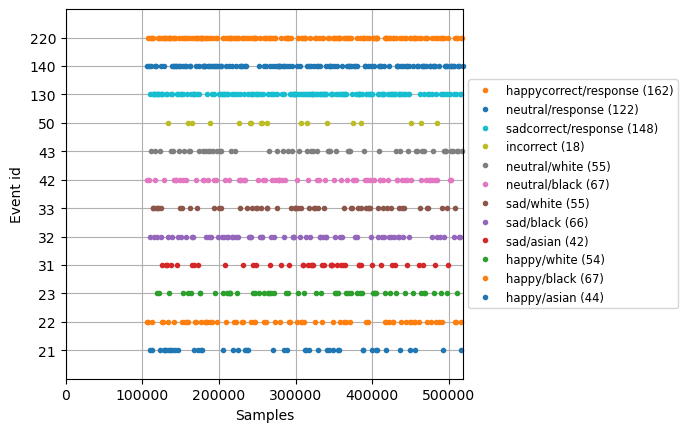

/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_18847/3635590512.py:3: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(events2, event_id=event_id2, on_missing='warn');


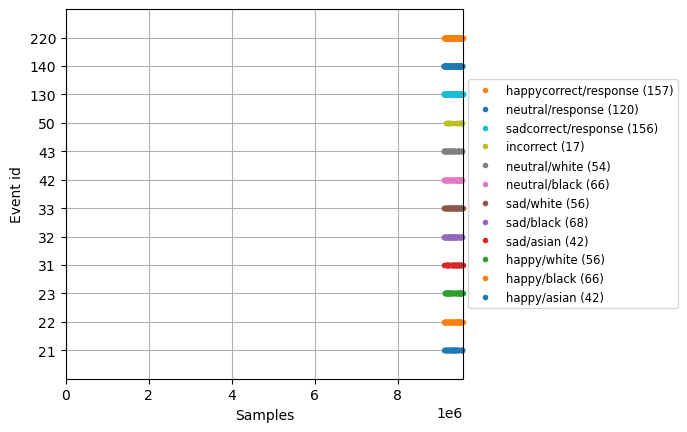

In [159]:
# visualize events  
mne.viz.plot_events(events, event_id=event_id, on_missing='warn'); 
mne.viz.plot_events(events2, event_id=event_id2, on_missing='warn'); 

In [160]:
# for ERPs
tmin, tmax = -0.1, 0.8  # in s

epochs1 = mne.Epochs(
    raw,
    events=events, # using the updated events-timestamps
    event_id=event_id,
    tmin=tmin,
    tmax=tmax,
    verbose=False,
)

epochs2 = mne.Epochs(
    raw2,
    events=events2, # using the updated events-timestamps
    event_id=event_id2,
    tmin=tmin,
    tmax=tmax,
    verbose=False,
)

## Subsetting 

In [161]:
# For the first 
nw_1 = epochs1['neutral/white']
nb_1 = epochs1['neutral/black']
sw_1 = epochs1['sad/white']
sb_1 = epochs1['sad/black']
hw_1 = epochs1['happy/white']
hb_1 = epochs1['happy/black']

# general emotions
happy_1 = epochs1['happy/black', 'happy/white']
sad_1 = epochs1['sad/black', 'sad/white']
neutral_1 = epochs1['neutral/black', 'neutral/white']
# general ethnicities
black_1 = epochs1['happy/black', 'sad/black', 'sad/neutral']
white_1 = epochs1['happy/white', 'sad/white', 'sad/white']


## and the second 
nw_2 = epochs2['neutral/white']
nb_2 = epochs2['neutral/black']
sw_2 = epochs2['sad/white']
sb_2 = epochs2['sad/black']
hw_2 = epochs2['happy/white']
hb_2 = epochs2['happy/black']

# general emotions
happy_2 = epochs2['happy/black', 'happy/white']
sad_2 = epochs2['sad/black', 'sad/white']
neutral_2 = epochs2['neutral/black', 'neutral/white']
# general ethnicities
black_2 = epochs2['happy/black', 'sad/black', 'sad/neutral']
white_2 = epochs2['happy/white', 'sad/white', 'sad/white']

## Plotting epochs

Using data from preloaded Raw for 900 events and 901 original time points ...


0 bad epochs dropped
Not setting metadata
900 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


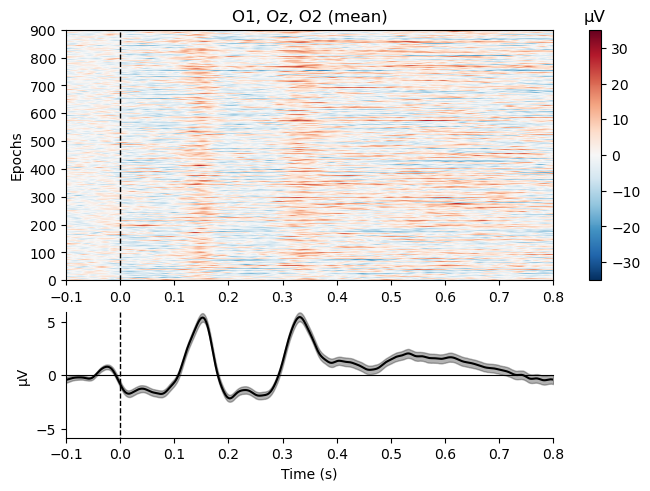

Using data from preloaded Raw for 900 events and 901 original time points ...
0 bad epochs dropped
Not setting metadata
900 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


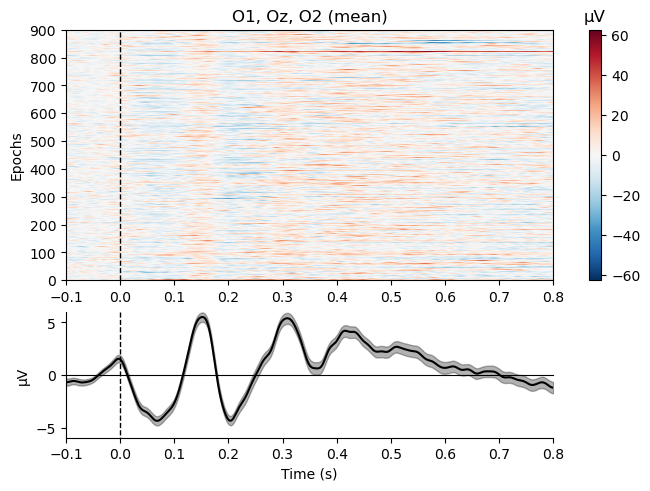

In [162]:
# plotting from channels over occipital cortex (looking for P1-N1-P2)
picks = ['O1','Oz','O2']
epochs1.plot_image(picks=picks, combine='mean');
# same for the others
epochs2.plot_image(picks=picks, combine='mean');


Using data from preloaded Raw for 67 events and 901 original time points ...
0 bad epochs dropped
Not setting metadata
67 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


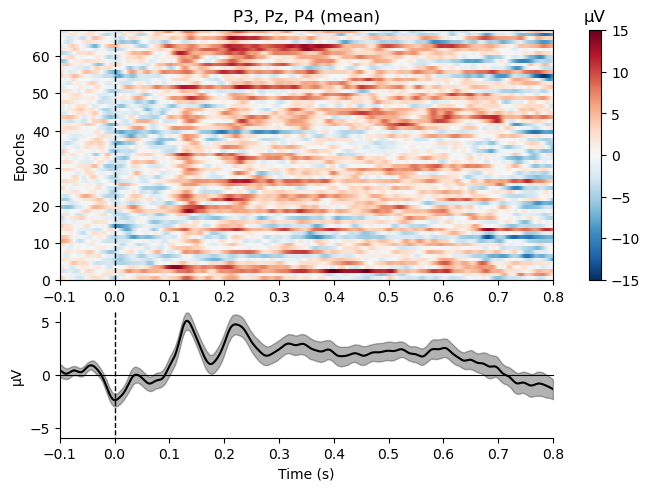

Using data from preloaded Raw for 66 events and 901 original time points ...
0 bad epochs dropped
Not setting metadata
66 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


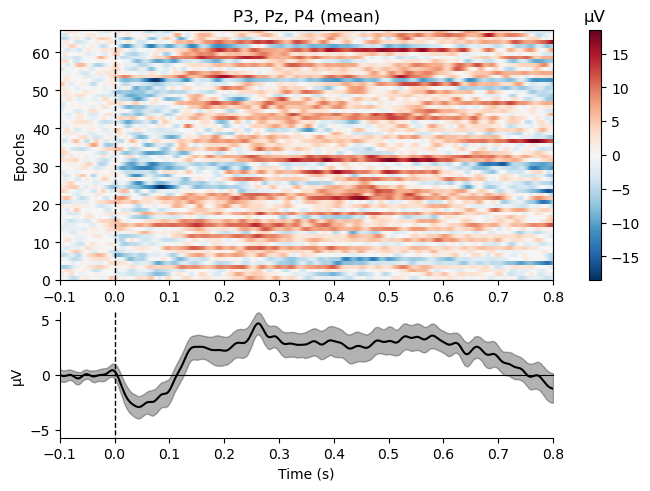

In [163]:
# plotting from channels over parietal cortex (potential P3) - and only the one event type
# just chose on condition as an example (happy black)
picks = ['P3','Pz','P4']
hb_1.plot_image(picks=picks, combine='mean');
# same for the other
hb_2.plot_image(picks=picks, combine='mean');

# Evoked

In [164]:
evoked1 = epochs1.average()
# Create evoked responses for each condition
evoked1_nw = nw_1.average() 
evoked1_nb = nb_1.average() 
evoked1_sw = sw_1.average() 
evoked1_sb = sb_1.average() 
evoked1_hw = hw_1.average() 
evoked1_hb = hb_1.average() 

evoked_happy = happy_1.average()
evoked_sad = sad_1.average() 
evoked_neutral = neutral_1.average()

evoked_black = black_1.average() 
evoked_white = white_1.average() 


# for the second 
evoked2 = epochs2.average()
# Create evoked responses for each condition
evoked2_nw = nw_2.average() 
evoked2_nb = nb_2.average() 
evoked2_sw = sw_2.average() 
evoked2_sb = sb_2.average() 
evoked2_hw = hw_2.average() 
evoked2_hb = hb_2.average() 

evoked2_happy = happy_2.average()
evoked2_sad = sad_2.average() 
evoked2_neutral = neutral_2.average()

evoked2_black = black_2.average() 
evoked2_white = white_2.average() 


No projector specified for this dataset. Please consider the method self.add_proj.


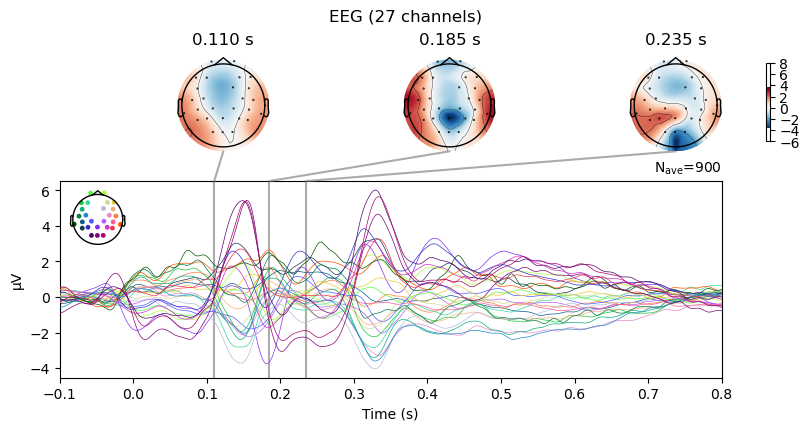

No projector specified for this dataset. Please consider the method self.add_proj.


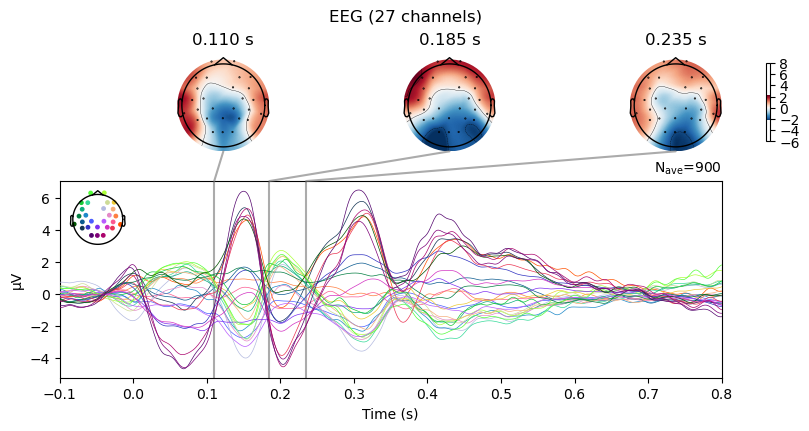

In [165]:

times = [0.11, 0.185, 0.235]

evoked1.plot_joint(times=times);
evoked2.plot_joint(times=times);

combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


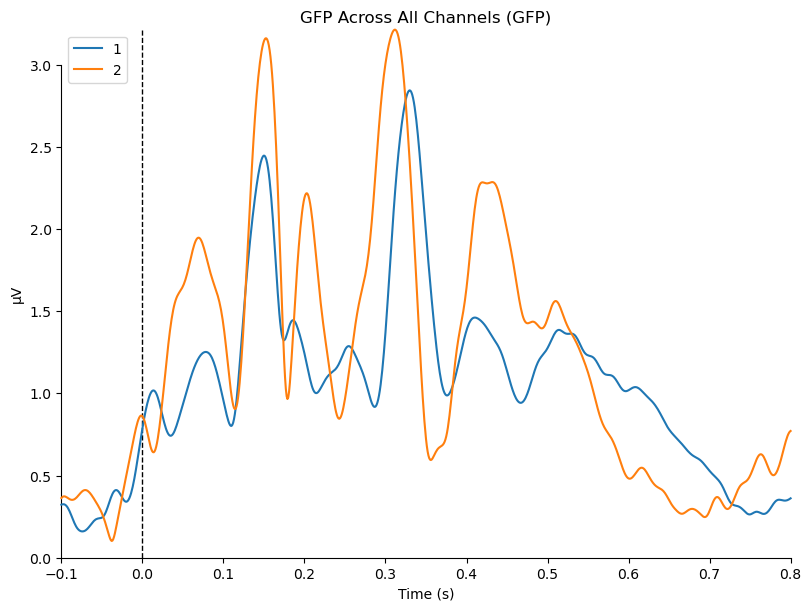

In [166]:
### Evokeds for both participants
mne.viz.plot_compare_evokeds({'Sub1': evoked1, 'Sub2': evoked2}, title='GFP Across All Channels');


## Some general plotting 

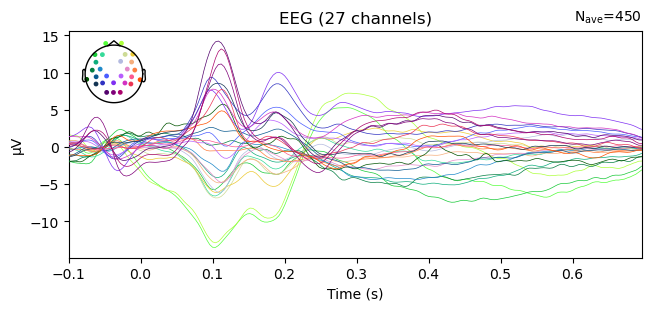

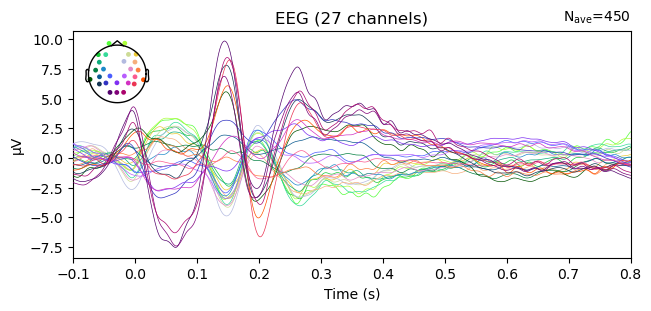

In [169]:
# Plot the response epochs 
img_events1 = ['happy/white', 'neutral/white', 'sad/white', 'happy/black', 'neutral/black', 'sad/black', 'happy/asian', 'sad/asian']  # all image events 
img_epochs1 = epochs[img_events] 

# Average across epochs
img_avg1 = img_epochs1.average()
img_avg1.plot();


# For number 2
img_events2 = ['happy/white', 'neutral/white', 'sad/white', 'happy/black', 'neutral/black', 'sad/black', 'happy/asian', 'sad/asian']  # all image events 
img_epochs2 = epochs2[img_events2] 

# Average across epochs
img_avg2 = img_epochs2.average()
img_avg2.plot();

In [176]:
# Save
outpath = os.path.join(os.getcwd(), 'epochs')

if not os.path.exists(outpath):
    os.makedirs(outpath)

epochs1.save(os.path.join(outpath, 'epochs_own_sub1-epo.fif'), overwrite=True)

epochs2.save(os.path.join(outpath, 'epochs_own2_ah-epo.fif'), overwrite=True)


Overwriting existing file.
Using data from preloaded Raw for 1 events and 901 original time points ...
Overwriting existing file.
Using data from preloaded Raw for 900 events and 901 original time points ...
Overwriting existing file.
Using data from preloaded Raw for 1 events and 901 original time points ...
Overwriting existing file.
Using data from preloaded Raw for 900 events and 901 original time points ...
